In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn import datasets

from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as sch
import seaborn as sns

In [2]:
df = pd.read_csv('Enumerated dataset.csv')
df.head()

,Age,Education level,Number of use Internet and Internet-related services,Internet/ Digital devices skills level,Secure of person's digital devices,Legitimacy of a website,Password with personal information,Aware of the danger of clicking pop-up screens,Attention to person's account privacy,Protection of social media services for personal info,...,blogs1,etc.1,Government websites (e.g. CERT)1,I do not feel that I keep myself updated1,Rely on automatic updates1,Internet service provider ISPs1,Other- Messages from Communication Company1,Others: Twitter1,Other- Twitter1,etc..1
0,0,3,2,1,3,4,0,4,4,2,...,1,1,0,0,0,0,0,0,0,0
1,0,2,2,1,4,0,4,4,4,3,...,1,1,0,0,0,0,0,0,0,0
2,0,2,2,1,4,3,3,4,4,3,...,1,1,0,0,0,0,0,0,0,0
3,0,2,2,1,4,2,0,3,1,3,...,1,1,0,0,0,0,0,0,0,0
4,0,2,2,1,4,3,1,4,3,2,...,1,1,0,0,0,0,0,0,0,0


In [3]:
df.shape

(1213, 224)

In [4]:
# Checking the correlation for the data of our target ( Victim of cybercrime )
#The dataset contain too many columns, correlation map will not be useful
df.corrwith(df["Victim of cybercrime"]).sort_values( ascending=False)

Victim of cybercrime                                                                                 1.000000
Bank                                                                                                 0.145149
Online personal information is not secure enough                                                     0.135610
No one                                                                                               0.109586
Responsibility of those offering online/Internet-based servicesin raising awareness of cybercrime    0.105763
                                                                                                       ...   
I don't know.1                                                                                      -0.086462
Don’t know but will ask my friends for advice                                                       -0.106505
Well protected against cybercrime                                                                   -0.106858
Laws are e

In [5]:
# Finding the best features to use for the traning and store it
corrArray=df.corrwith(df['Victim of cybercrime']).sort_values( ascending=False)
# pick the best 10 columns. 5 from the top and 5 from the last
first5=corrArray[1:11]
first5= list(first5.index)
first5

['Bank',
 'Online personal information is not secure enough',
 'No one',
 'Responsibility of those offering online/Internet-based servicesin raising awareness of cybercrime',
 'Education level',
 'Role of the government in combating cybercrimes_No role',
 'Apple store',
 'Education',
 'Government or professional reports',
 'PIN)']

In [6]:
# Finding the best features to use for the traning and store it
corrArray=df.corrwith(df['Victim of cybercrime']).sort_values( ascending=False)
# pick the best 20 columns. 10 from the top and 10 from the last
last5=corrArray[-10:]
last5= list(last5.index)
last5

['Legitimacy of a website',
 'Role of the government in combating cybercrimes_Have stricter laws and punishments for cyber crimes',
 'Concerned about encountering material promotes hatred or religious extremism',
 'Concerned about receiving phishing emails',
 'I do not feel that I keep myself updated',
 "I don't know.1",
 'Don’t know but will ask my friends for advice',
 'Well protected against cybercrime',
 'Laws are effective in managing the cybercrime problem',
 'Report cybercrime']

## PCA

In [7]:
# Selecting features
# Save X data
X = df[first5 + last5]

# Encode our target
le = LabelEncoder()
y = le.fit_transform(df['Victim of cybercrime'])

In [8]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20)

In [9]:
# Instantiate & fit data using PCA
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [10]:
# components
pca.components_

array([[ 1.13730012e-03, -6.90594581e-02,  1.79361216e-04,
        -8.99199932e-02,  7.43997429e-02,  1.04781642e-03,
         3.78831989e-03,  6.11062522e-02,  1.86019160e-02,
         5.85471251e-02, -3.09896225e-01, -6.48319654e-02,
         1.21233614e-01,  1.14606421e-01,  4.04757562e-02,
        -6.09723068e-03,  3.64499611e-02, -6.72788868e-01,
        -6.22389548e-01, -5.47409396e-02],
       [ 1.42248836e-03, -6.99252309e-01,  8.39984039e-04,
        -3.87281994e-01, -8.30301447e-02,  4.32558303e-03,
        -4.55353172e-03, -1.08942673e-01, -9.57921159e-02,
        -4.74766795e-02, -2.42266633e-01, -5.72543344e-03,
         2.97441751e-01,  2.77217496e-01,  9.31803548e-02,
         5.26157858e-02,  2.28511283e-02,  3.02837819e-01,
         1.04998553e-02,  5.46151404e-02],
       [ 7.48690894e-04,  4.15320741e-01, -3.12417090e-03,
        -2.01554452e-01, -9.05888419e-02, -1.26681037e-02,
        -3.53123758e-03, -5.13962582e-02, -1.43637742e-01,
        -9.66562185e-02, -5.8

In [11]:
pd.Series(pca.explained_variance_ratio_) 

0     0.196665
1     0.165226
2     0.102293
3     0.085195
4     0.082133
5     0.071805
6     0.047931
7     0.042551
8     0.037438
9     0.031270
10    0.029100
11    0.027514
12    0.021679
13    0.020944
14    0.015642
15    0.014666
16    0.006795
17    0.000515
18    0.000379
19    0.000260
dtype: float64

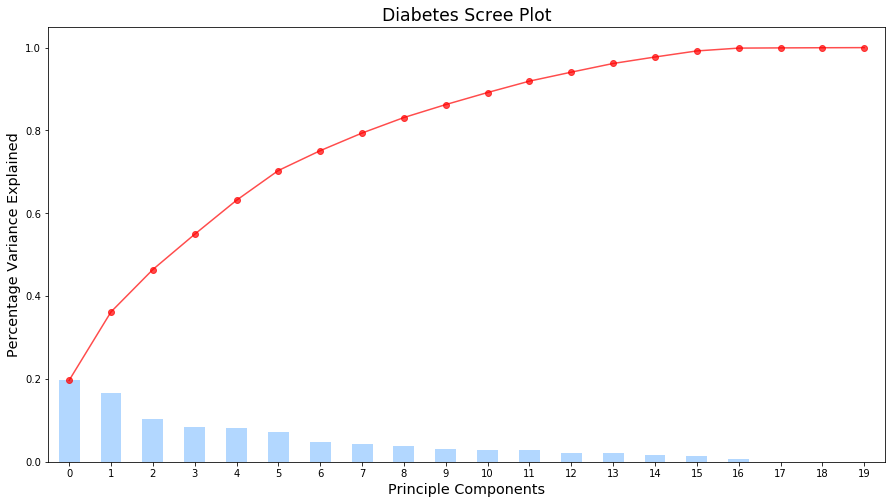

In [12]:
plt.style.use("seaborn-pastel")
plt.figure(figsize=(15,8))

exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.7) # plot bar chart

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="o", alpha=0.7, color = 'red' ) #plot line chart of increasing variances

plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Diabetes Scree Plot", fontsize="xx-large")
plt.show();

In [13]:
# Instantiate Standard Scaler
scaler = StandardScaler()

# Fit & transform data
X_train_sc = scaler.fit_transform(X_train)

X_test_sc = scaler.transform(X_test)

In [14]:
# Fit PCA
pca = PCA(n_components = 9)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

# Created two model to compare training time
logreg_noPCA = LogisticRegression(max_iter=1230) # Set max_iter so model reaches convergence

logreg = LogisticRegression()

In [15]:
# Measure how long it takes to train WITHOUT PCA

print('Measure how long it takes to train WITHOUT PCA')
%timeit logreg_noPCA.fit(X_train, y_train)

print()

# Measure how long it takes to train with PCA

print('Measure how long it takes to train WITH PCA')
%timeit logreg.fit(X_train_pca, y_train)

Measure how long it takes to train WITHOUT PCA
29.8 ms ± 1.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Measure how long it takes to train WITH PCA
4.7 ms ± 245 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
# PCA Model
print('PCA Training accuracy:',logreg_noPCA.score(X_train, y_train)) 
print('PCA Testing accuracy:', logreg_noPCA.score(X_test, y_test))

PCA Training accuracy: 0.9649484536082474
PCA Testing accuracy: 0.9547325102880658


In [18]:
# PCA Model
print('PCA Training accuracy:',logreg.score(X_train_pca, y_train)) 
print('PCA Testing accuracy:', logreg.score(X_test_pca, y_test))

PCA Training accuracy: 0.9412371134020618
PCA Testing accuracy: 0.9300411522633745


## KMeans

In [ ]:
df1 = df[['Report cybercrime', 'Victim of cybercrime', 'Bank']]

In [ ]:
X = df.iloc[:,[0,1]].values
X

array([[0, 3],
       [0, 2],
       [0, 2],
       ...,
       [0, 2],
       [0, 2],
       [0, 2]], dtype=int64)

In [ ]:
y= df[['Victim of cybercrime']]
y

,Victim of cybercrime
0,1
1,0
2,1
3,0
4,1
...,...
1208,0
1209,0
1210,0
1211,0


In [ ]:
X1 =df.drop('Victim of cybercrime',axis=1)
X1

,Age,Education level,Number of use Internet and Internet-related services,Internet/ Digital devices skills level,Secure of person's digital devices,Legitimacy of a website,Password with personal information,Aware of the danger of clicking pop-up screens,Attention to person's account privacy,Protection of social media services for personal info,...,blogs1,etc.1,Government websites (e.g. CERT)1,I do not feel that I keep myself updated1,Rely on automatic updates1,Internet service provider ISPs1,Other- Messages from Communication Company1,Others: Twitter1,Other- Twitter1,etc..1
0,0,3,2,1,3,4,0,4,4,2,...,1,1,0,0,0,0,0,0,0,0
1,0,2,2,1,4,0,4,4,4,3,...,1,1,0,0,0,0,0,0,0,0
2,0,2,2,1,4,3,3,4,4,3,...,1,1,0,0,0,0,0,0,0,0
3,0,2,2,1,4,2,0,3,1,3,...,1,1,0,0,0,0,0,0,0,0
4,0,2,2,1,4,3,1,4,3,2,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,0,2,2,1,5,4,3,2,4,3,...,0,0,0,0,1,0,0,0,0,0
1209,0,2,2,0,1,3,1,3,4,3,...,1,0,1,0,1,0,0,0,0,1
1210,0,2,2,1,3,3,1,2,3,1,...,0,0,0,1,0,0,0,0,0,0
1211,0,2,2,1,5,3,0,2,4,2,...,0,0,1,0,0,0,0,0,0,0


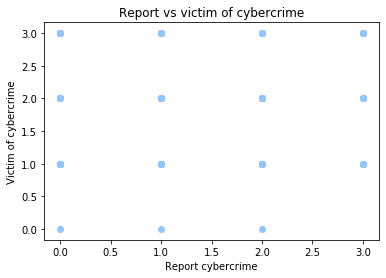

In [ ]:
# Initial EDA to determine possible number of clusters in our data "customer groups"

plt.scatter(X[:,0], X[:,1])

plt.xlabel('Report cybercrime')
plt.ylabel('Victim of cybercrime')
plt.title('Report vs victim of cybercrime')
plt.show()

### Elbow Graph

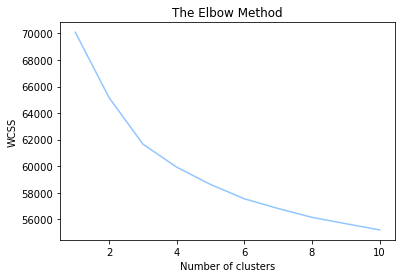

In [ ]:
# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss = []
# Note: We are using K-mean++ to avoid the random initialization trap 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the plot we can see that the optimal number of clusters in 5 
# Note: This is also based on your judgment and your understanding of the dataset 

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 123)

y_kmeans = kmeans.fit_predict(X1)

In [ ]:
y_kmeans

array([2, 1, 0, ..., 1, 2, 1])

In [ ]:
# This prints the Report cybercrime in the 1st cluster --> cluster 0
print (X[y_kmeans == 0, 0])

print('\n')

# This prints the sVictim of cybercrime in the 1st cluster --> cluster 0
print (X[y_kmeans == 0, 1])

[0 0 0 0 0 2 2 0 1 2 2 0 3 0 2 0 0 2 2 0 2 2 0 0 0 1 2 1 2 1 2 2 1 1 2 2 0
 2 0 2 1 0 1 2 3 0 2 2 1 3 2 1 1 2 0 0 1 1 0 0 2 2 2 2 0 2 0 2 2 0 2 0 0 0
 0 2 2 0 2 3 0 2 1 1 0 0 0 0 0 1 3 2 0 3 0 0 0 3 0 1 2 1 0 1 2 0 0 2 0 0 1
 3 2 1 1 3 1 3 1 1 2 3 2 1 3 1 1 3 1 2 0 1 1 2 2 0 0 0 2 2 0 1 0 0 0 0 0 3
 3 1 1 0 2 1 1 2 0 3 1 0 0 3 2 0 2 2 2 2 2 1 2 0 1 1 3 0 2 1 0 3 2 3 1 1 3
 3 2 1 1 2 3 1 2 2 1 2 0 0 1 0 2 2 1 2 1 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 1 2 0 1 1 0 0 0 0 0 0 3 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 1 2 1 0 0 0
 1 0 1 2 0 1 0 0 0 0 0 0 0 0 1 2 0 1 0 0 0 0 2 2 0 0 0 2 0 0 1 1 2 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 2 2 0 0 0 2 0 0 1 2 1 0 0 0 0 2 0 1 0 0
 0 2 1 0 2 0 2 0 0 1 2 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 0 2 2
 0 0 2 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0]


[2 3 2 2 1 2 2 3 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 2 2
 2 2 2 2 2 1 2 2 2 2 3 2 2 2 2 1 3 1 1 2 2 2 2 3 2 2 3 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 3 2 2 2

In [ ]:
# Cluster centeriods

print (kmeans.cluster_centers_)

[[ 8.64321608e-01  1.95728643e+00  1.86934673e+00  8.94472362e-01
   3.97487437e+00  3.41708543e+00  3.05025126e+00  3.57035176e+00
   3.57788945e+00  3.10301508e+00  3.26884422e+00  3.29648241e+00
   2.61809045e+00  2.81407035e+00  3.36432161e+00  3.56783920e+00
   2.76381910e+00  3.56030151e+00  3.40452261e+00  3.22361809e+00
   2.80402010e+00  3.60301508e+00  3.29899497e+00  3.03768844e+00
   1.09798995e+00  1.06783920e+00  1.02010050e+00  1.02261307e+00
   1.02010050e+00  1.03266332e+00  1.16582915e+00  1.29145729e+00
   1.20854271e+00  1.18090452e+00  1.22110553e+00  1.24120603e+00
   2.26633166e+00  3.52763819e+00  3.64070352e+00  3.53266332e+00
   3.52512563e+00  3.47989950e+00  7.56281407e-01  5.62814070e-01
   4.37185930e-01  1.95156391e-18  2.51256281e-03  1.95156391e-18
   1.95156391e-18  1.25628141e-02  7.53768844e-03  1.95156391e-18
   1.95156391e-18  5.02512563e-03  2.51256281e-03  5.52763819e-02
   3.01507538e-02  2.28643216e-01  1.00502513e-02 -1.56125113e-17
   7.80625

In [ ]:
# The Report cybercrime for the centriods
print (kmeans.cluster_centers_[:, 0])

# The Victim of cybercrime for the centriods
print (kmeans.cluster_centers_[:, 1])

[0.86432161 0.81715576 0.79032258]
[1.95728643 2.01580135 2.12365591]


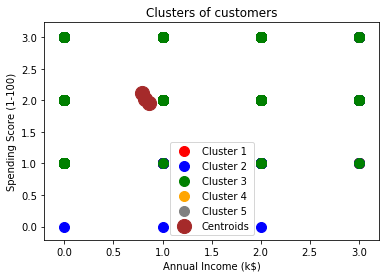

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')

plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'grey', label = 'Cluster 5')

#plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'black', label = 'Cluster 6')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'brown', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
#print (np.where(y_kmeans ==0 )[0])

# KMeans

In [ ]:
df1 = df.copy()

X1= df1.drop('Victim of cybercrime',axis=1)

### Elbow Graph

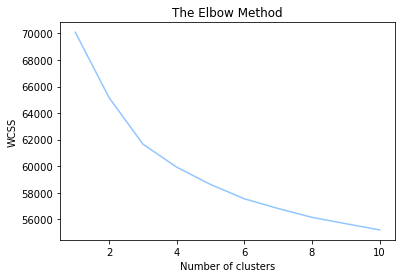

In [ ]:
# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss = []
# Note: We are using K-mean++ to avoid the random initialization trap 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the plot we can see that the optimal number of clusters in 3 or 5 
# Note: This is also based on your judgment and your understanding of the dataset 

### Three Cluster

In [ ]:
df1 = df.copy()

X1= df1.drop('Victim of cybercrime',axis=1)


kmeans = KMeans(n_clusters=3)

y = kmeans.fit_predict(X1)

df1['Cluster'] = y

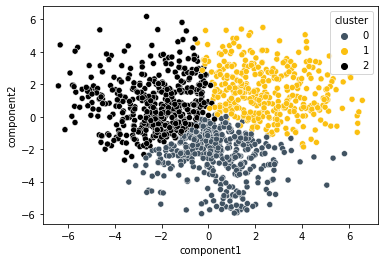

In [ ]:
pca = PCA(2)
data = pd.DataFrame(pca.fit_transform(df1.drop(['Cluster','Victim of cybercrime'],axis=1)),
             columns = ['component1','component2'])
data['cluster'] = df1['Cluster'] 

sns.scatterplot(data=data,x = "component1",y="component2",hue="cluster", palette=['#415362','#fbc010', '#000000'])

### Five Cluster

In [ ]:
df1 = df.copy()

X1= df1.drop('Victim of cybercrime',axis=1)


kmeans = KMeans(n_clusters=5)

y = kmeans.fit_predict(X1)

df1['Cluster'] = y

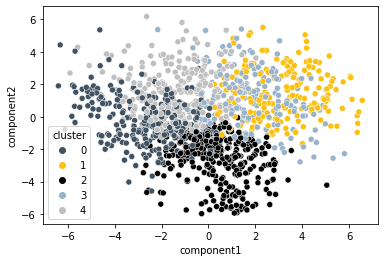

In [ ]:
pca = PCA(2)
data = pd.DataFrame(pca.fit_transform(df1.drop(['Cluster','Victim of cybercrime'],axis=1)),
             columns = ['component1','component2'])
data['cluster'] = df1['Cluster'] 

sns.scatterplot(data=data,x = "component1",y="component2",hue="cluster",palette=['#415362','#fbc010', '#000000','#99B3CA', '#BFBFBF'])